---
---

<h1><center><ins>Exercise Sheet 7</ins></center></h1>
<h2><center>Numerical Methods <br><br>

---
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1 - Backward Euler:

Consider the following first-order ODE:

$$ \frac{d y}{dt} = - 3 y \ , $$

**(A)** Solve this ODE with **your own forward Euler** implementation for $0\leq t\leq20$. Use the following step sizes: $\Delta t = 0.1, 0.25, 0.5, 0.75$, and plot the numerical solution for all four step sizes in four different figures. Also compare it with the exact analytical solution in the corresponding plot. Discuss your findings.

**(B)** Now implement **your own backward Euler** implementation and repeat all the steps from **(A)**. What do you notice?

**(C)** What complication arises in the implementation of the backward Euler, if we replace the right hand side of the ODE with $ (1-\frac{y}{3})y $? What kind of numerical methods already known from the lecture can you use to solve the arising equation? Please implement them to solve this ODE with the backward Euler and compare your solution with analytic one by plotting them in a figure.

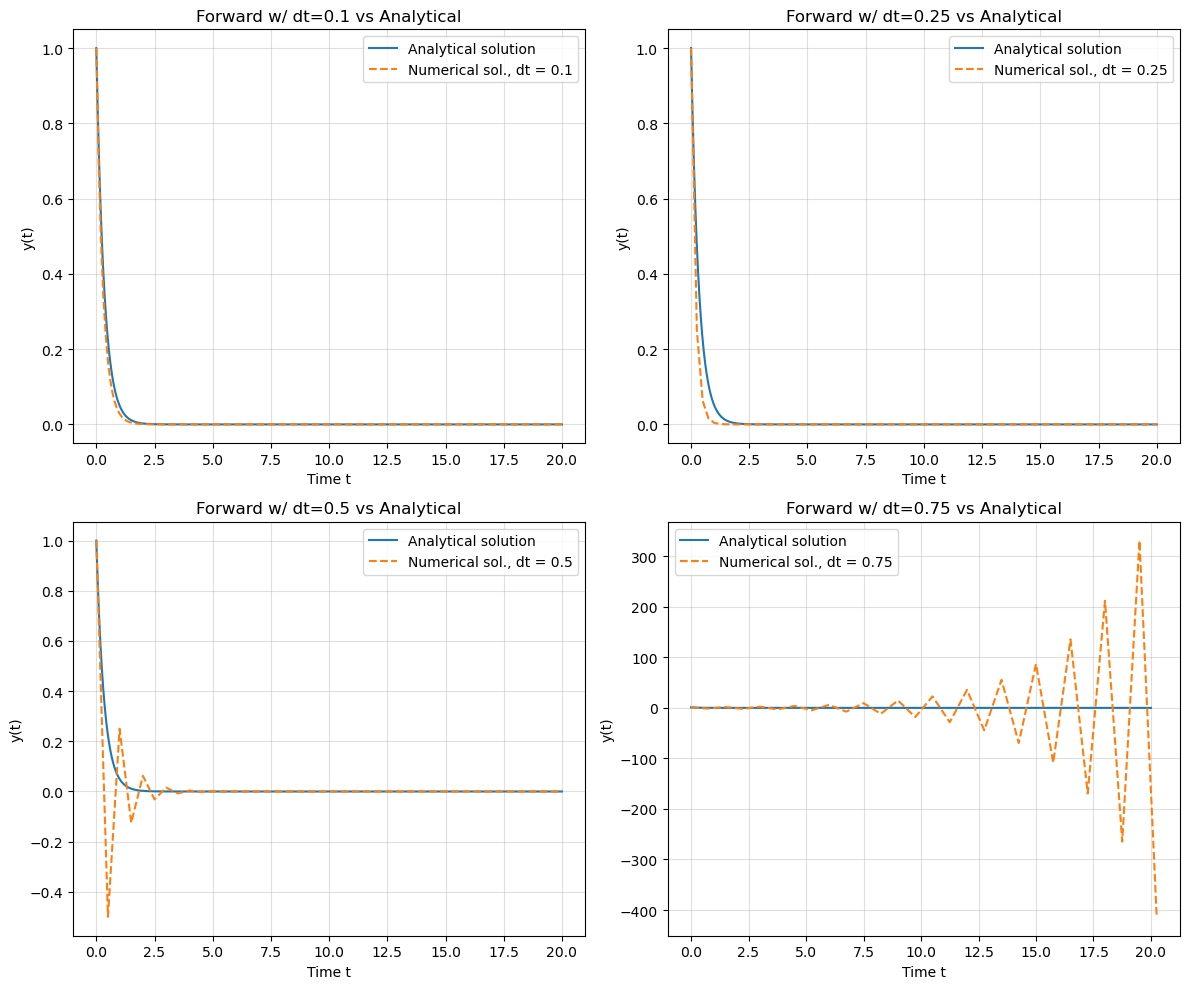

In [2]:
import numpy as np
import matplotlib.pyplot as plt

t0 = 0
t_end = 20
y0 = 1
dt_values = [0.1, 0.25, 0.5, 0.75]
euler_results = {}

def ODE(t, y):
    return -3 * y

def analytical_solution(t, y0):
    return y0 * np.exp(-3 * t)

def euler_method(f, t0, t_end, y0, dt): #forwards euler 
    t_values = np.arange(t0, t_end + dt, dt)
    N_values = np.zeros(len(t_values))
    N_values[0] = y0
    for i in range(1, len(t_values)):
        N_values[i] = N_values[i-1] + dt * f(t_values[i-1], N_values[i-1])
    return t_values, N_values


fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for idx, dt in enumerate(dt_values):
    t_ana = np.linspace(t0, t_end, 1000)
    y_ana = analytical_solution(t_ana, y0)
    t_num, y_num = euler_method(ODE, t0, t_end, y0, dt)
    
    ax = axs[idx]
    ax.plot(t_ana, y_ana, label='Analytical solution')
    ax.plot(t_num, y_num, '--', label=f'Numerical sol., dt = {dt}')
    ax.set_xlabel('Time t')
    ax.set_ylabel('y(t)')
    ax.legend()
    ax.grid(alpha=0.4)
    ax.set_title(f'Forward w/ dt={dt} vs Analytical')
        
plt.tight_layout()
plt.show()

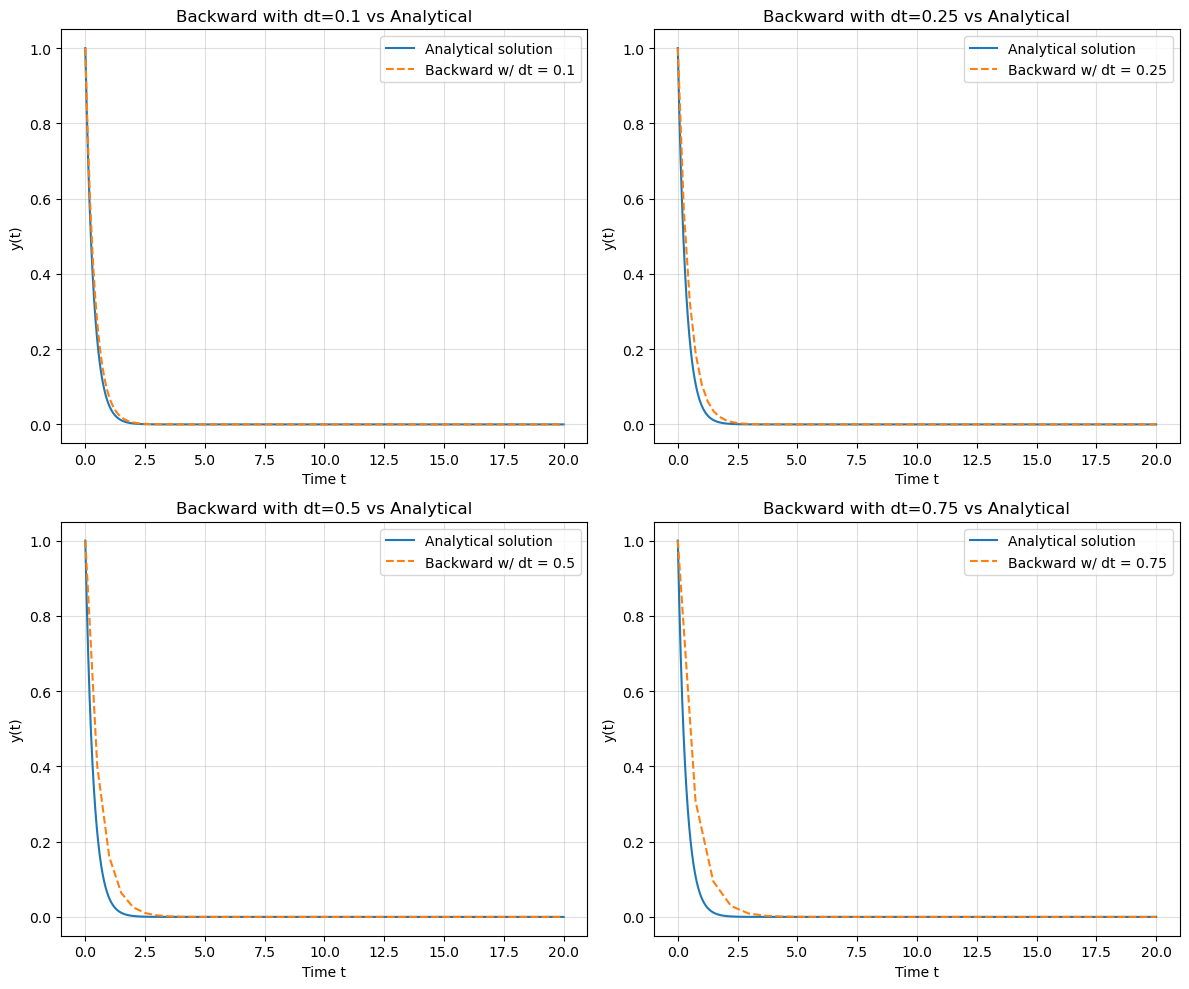

In [3]:

def backward_euler_linear(y0, t0, t_end, dt): #backwards euler
    num_steps = int(np.ceil((t_end - t0) / dt)) + 1
    t_values1 = np.linspace(t0, t_end, num_steps)
    y_values = np.zeros(num_steps)
    y_values[0] = y0
    
    for i in range(1, num_steps):
        y_values[i] = y_values[i-1] / (1 + 3 * dt)
    
    return t_values1, y_values

fig1, axs1 = plt.subplots(2, 2, figsize=(12, 10))
axs1 = axs1.flatten()

for idx, dt in enumerate(dt_values):
    t_ana1 = np.linspace(t0, t_end, 1000)
    y_ana1 = analytical_solution(t_ana1, y0)  # Corrected variable
    t_num1, y_num1 = backward_euler_linear(y0, t0, t_end, dt)
    
    ax = axs1[idx]
    ax.plot(t_ana1, y_ana1, label='Analytical solution')
    ax.plot(t_num1, y_num1, '--', label=f'Backward w/ dt = {dt}') 
    ax.set_xlabel('Time t')
    ax.set_ylabel('y(t)')
    ax.legend()
    ax.grid(alpha=0.4)
    ax.set_title(f'Backward with dt={dt} vs Analytical')
        
plt.tight_layout()
plt.show()

non linear works fine with backwars euler

__________

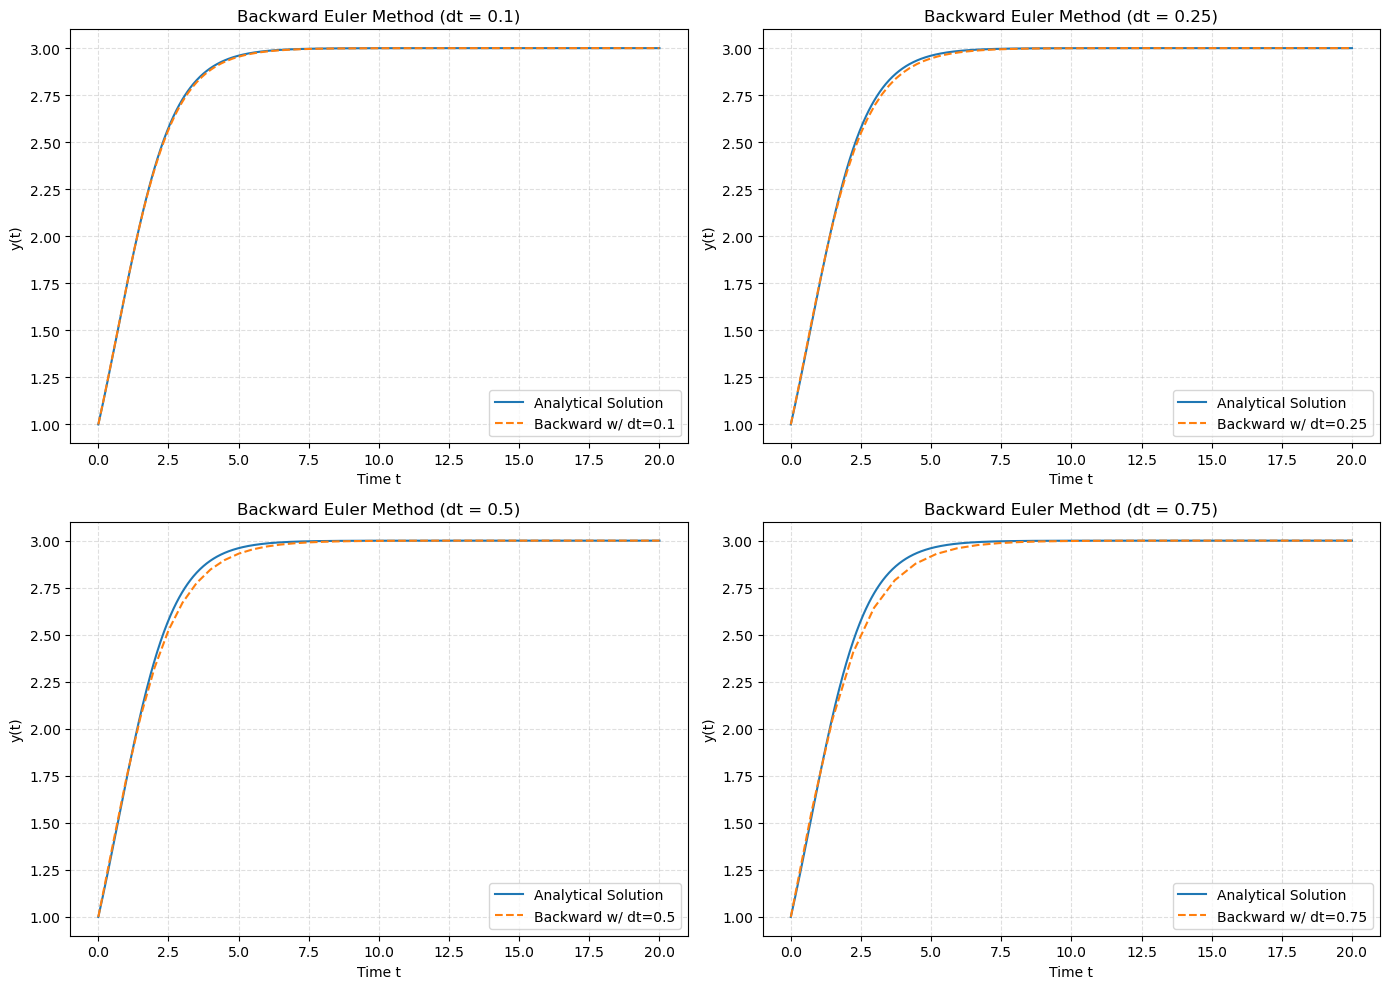

In [4]:
from scipy.optimize import newton

def analytical_solution1(t):
    return 3 / (1 + 2 * np.exp(-t))

def backward_euler_nonlinear(y0, t0, t_end, delta_t):
    num_steps = int(np.ceil((t_end - t0) / delta_t)) + 1
    t_values = np.linspace(t0, t_end, num_steps)
    y_values = np.zeros(num_steps)
    y_values[0] = y0
    
    for i in range(1, num_steps):
        # function to solve , rearranged
        def F(y_new):
            return y_new - y_values[i-1] - delta_t * y_new * (1 - y_new / 3)
        
        # deriv for newton method
        def F_prime(y_new):
            return 1 - delta_t * (1 - y_new / 3) + delta_t * y_new / 3
        
        # initial guess = y_n (previous value)
        y_guess = y_values[i-1]
        
        # iteratively finds the root of F(ynew)=0F(ynew​)=0, which corresponds to the value of y_new
        y_new = newton(F, y_guess, fprime=F_prime)
        y_values[i] = y_new
        
    return t_values, y_values

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for idx, dt in enumerate(dt_values):
    t_num, y_num = backward_euler_nonlinear(y0, t0, t_end, dt)
    t_ana = np.linspace(t0, t_end, 1000)
    y_ana = analytical_solution1(t_ana)
    
    ax = axs[idx]
    ax.plot(t_ana, y_ana, label='Analytical Solution')
    ax.plot(t_num, y_num, '--', label=f'Backward w/ dt={dt}')
    ax.set_title(f'Backward Euler Method (dt = {dt})')
    ax.set_xlabel('Time t')
    ax.set_ylabel('y(t)')
    ax.legend()
    ax.grid(alpha=0.4, ls="--")

plt.tight_layout()
plt.show()


##### (C)
unlike the non linear ODE having (1-y/3)y makes things complicated that is non-linear and we need to solve ode at each time step, an interative method (newton raphson) is necessary but it also requires a good initial guess

_____________

## Exercise 2 - Backward Euler Part 2:

Consider now the following second-order ODE:

$$ y^{\prime\prime} + 6 y^{\prime} + 5y = 10, $$

with initial conditions of $y(0) = 0$ and $y^{\prime}(0) = 5.$

**(A)** Solve this ODE with **your own backward Euler** implementation for $0\leq t\leq5$. What is the linear system of equation that you have to solve? (write it down in matrix notation). Within **your own backward Euler** implementation you are free to solve this system of equation using either numerical methods (e.g. np.linalg.solve) or invert the matrix by hand. Use a step size of 0.1 and 0.5. Plot the absolute error of the numerical solutions for both steps sizes compared to the exact solution. The exact solution is 

$$ y(t) = -\frac{3}{4}e^{-5t} -\frac{5}{4}e^{-t} + 2. $$


**(B)** Repeat **(A)** using **forward Euler**. What do you notice?

ODE becoms $(y_1', y_2')^T = (0, 1, -5, -6)^T * (y_1, y_2)^T +(0, 10)^T,   (y_1(0), y_2(0))^T = (0, 5)^T$


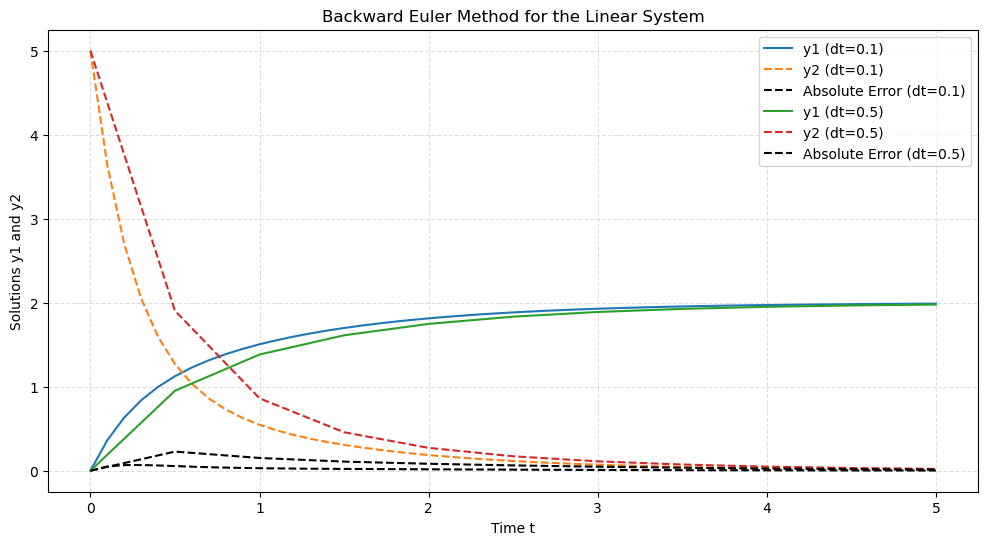

In [5]:
t2 = 0
t_end2 = 5

A = np.array([[0, 1], [-5, -6]])
B = np.array([0, 10])
y_0 = np.array([0, 5])

dt_values2 = [0.1, 0.5]
euler_results2 = {}


def backward_euler(y0, t0, t_end, dt, A, b):
    num_steps = int(np.ceil((t_end - t0) / dt)) + 1
    t_values = np.linspace(t0, t_end, num_steps)
    y_values = np.zeros((num_steps, len(y0)))
    y_values[0] = y0
    
    # Identity matrix
    I = np.eye(len(y0))
    
    # Precompute the matrix to invert
    M = I - dt * A
    
    if np.linalg.det(M) == 0:
        raise ValueError("Matrix (I - dt*A) is singular")
    
    # Compute the inverse once if A and dt are constant
    M_inv = np.linalg.inv(M)
    
    for i in range(1, num_steps):
        # Right-hand side: y_n + dt * b
        rhs = y_values[i-1] + dt * b
        # Compute y_{n+1} = M_inv * rhs
        y_values[i] = M_inv @ rhs
    
    return t_values, y_values

for dt in dt_values2:
    t, y = backward_euler(y_0, t2, t_end2, dt, A, B)
    euler_results2[dt] = (t, y)

def exact_solution(t):
    return -0.75 * np.exp(-5 * t) - 1.25 * np.exp(-t) + 2

plt.figure(figsize=(12, 6))
for dt in dt_values2:
    t, y = euler_results2[dt]
    y_numerical = y[:, 0]  # y1 corresponds to y
    y_exact = exact_solution(t)
    abs_error = np.abs(y_numerical - y_exact)
    plt.plot(t, y[:, 0], label=f'y1 (dt={dt})')
    plt.plot(t, y[:, 1], '--', label=f'y2 (dt={dt})')
    plt.plot(t, abs_error, 'k--', label=f'Absolute Error (dt={dt})')

plt.xlabel('Time t')
plt.ylabel('Solutions y1 and y2')
plt.title('Backward Euler Method for the Linear System')
plt.legend()
plt.grid(alpha=0.4, ls="--")
plt.show()

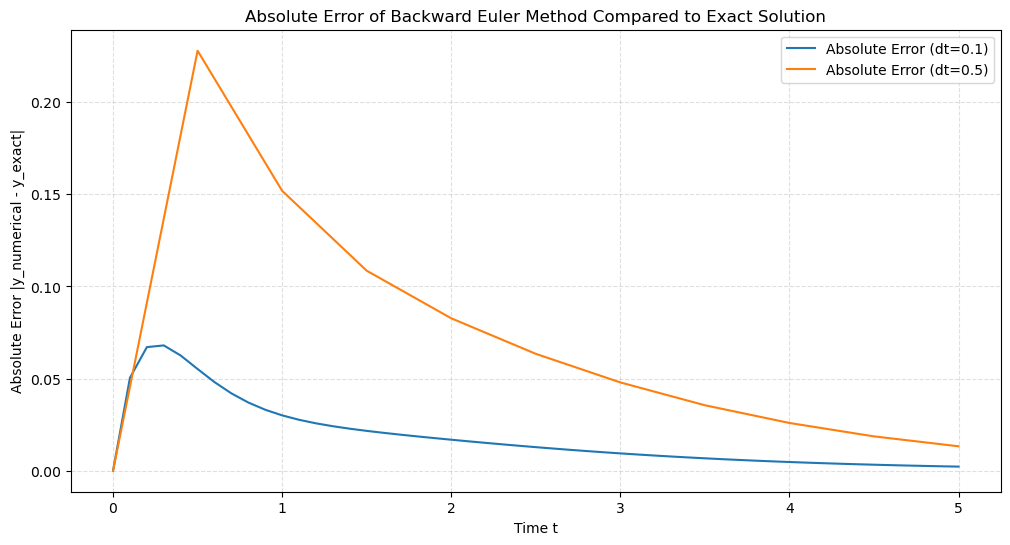

In [6]:
plt.figure(figsize=(12, 6))
for dt in dt_values2:
    t, y = euler_results2[dt]
    y_numerical = y[:, 0]  # y1 corresponds to y
    y_exact = exact_solution(t)
    abs_error = np.abs(y_numerical - y_exact)
    
    plt.plot(t, abs_error, label=f'Absolute Error (dt={dt})')

plt.xlabel('Time t')
plt.ylabel('Absolute Error |y_numerical - y_exact|')
plt.title('Absolute Error of Backward Euler Method Compared to Exact Solution')
plt.legend()
plt.grid(alpha=0.4, ls="--")
plt.show()

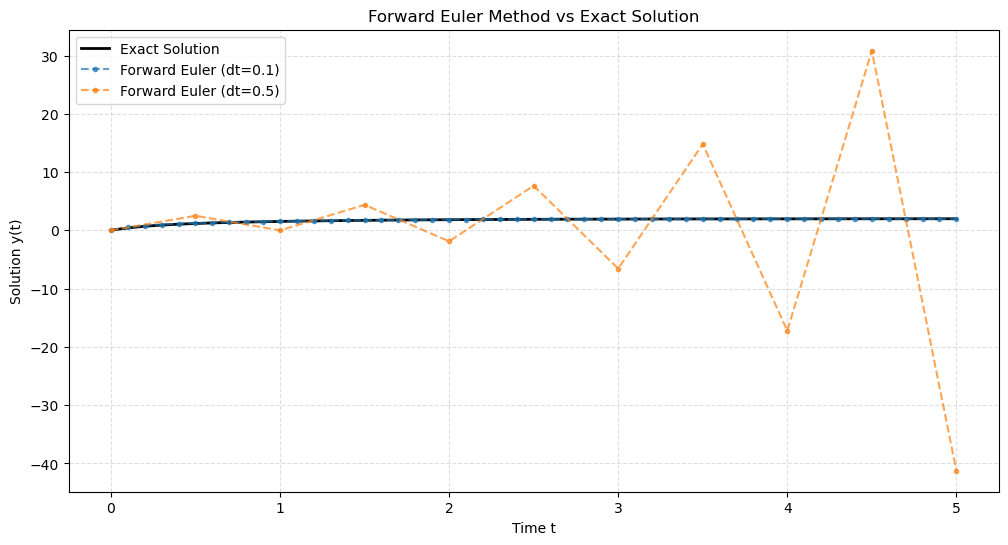

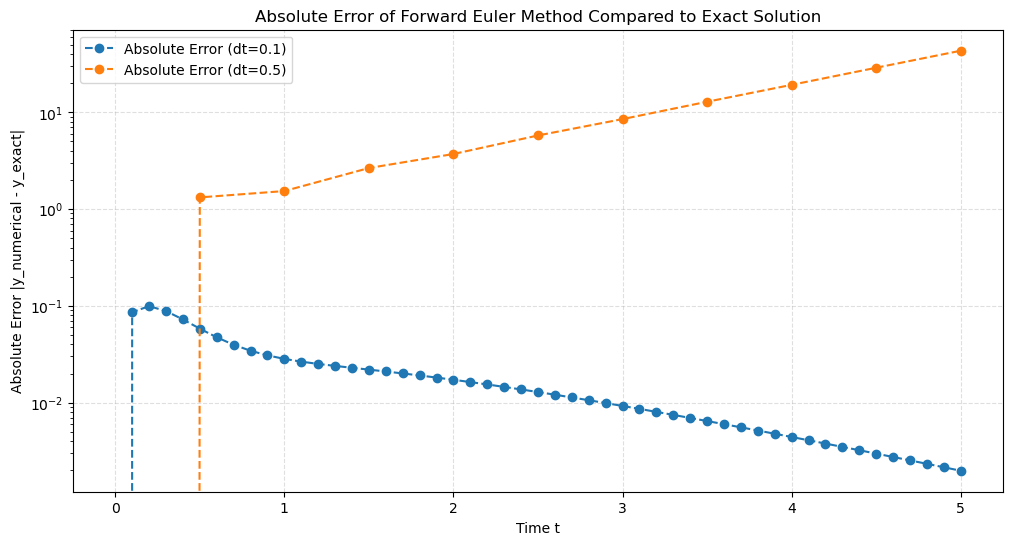

In [7]:
euler_results3 = {}
def forward_euler_system(f, y0, t0, t_end, dt):
    num_steps = int(np.ceil((t_end - t0) / dt)) + 1
    t_values = np.linspace(t0, t_end, num_steps)
    y_values = np.zeros((num_steps, len(y0)))
    y_values[0] = y0
    
    for i in range(1, num_steps):
        y_prev = y_values[i-1]
        t_prev = t_values[i-1]
        y_values[i] = y_prev + dt * f(t_prev, y_prev)
    
    return t_values, y_values

def system_f(t, y):
    return A @ y + B
def exact_solution(t):
    return -0.75 * np.exp(-5 * t) - 1.25 * np.exp(-t) + 2
def exact_y1(t):
    return exact_solution(t)

for dt in dt_values2:
    t, y = forward_euler_system(system_f, y_0, t2, t_end2, dt)
    euler_results3[dt] = (t, y)

t_exact = np.linspace(t2, t_end2, 1000)
y_exact = exact_y1(t_exact)

plt.figure(figsize=(12, 6))
plt.plot(t_exact, y_exact, label='Exact Solution', linewidth=2, color='black')
for dt in dt_values2:
    t, y = euler_results3[dt]
    plt.plot(t, y[:, 0], marker='.', linestyle='--', alpha=0.7 , label=f'Forward Euler (dt={dt})')

plt.xlabel('Time t')
plt.ylabel('Solution y(t)')
plt.title('Forward Euler Method vs Exact Solution')
plt.legend()
plt.grid(alpha=0.4, ls="--")
plt.show()


plt.figure(figsize=(12, 6))

for dt in dt_values2:
    t, y = euler_results3[dt]
    y_numerical = y[:, 0] 
    y_exact_num = exact_y1(t)
    abs_error = np.abs(y_numerical - y_exact_num)
    
    plt.plot(t, abs_error, marker='o', linestyle='--', label=f'Absolute Error (dt={dt})')

plt.xlabel('Time t')
plt.ylabel('Absolute Error |y_numerical - y_exact|')
plt.title('Absolute Error of Forward Euler Method Compared to Exact Solution')
plt.legend()
plt.yscale('log')  # Use logarithmic scale for better visibility
plt.grid(alpha=0.4, ls="--")
plt.show()

## Exercise 3 - More Oscillators:

Consider again a system of a mass that is attached to a spring. We have seen (look at Exercise Sheet 6 Exercise Number 3) that the resuling ODE describing such a system is of the form

$$ \frac{d^2 x}{dt^2} = - \frac{k}{m} x \ , $$

where $m$ is the mass of your particle, $k$ is the spring constant, and $x$ is the displacement from the equilibrium position.

**(A)** Implement the Leapfrog integration in oder to solve this ODE. Follow the section "Algorithm" under https://en.wikipedia.org/wiki/Leapfrog_integration. Consider the same values for the constants and initial conditions from Exercise Sheet 6 and plot your result by comparing with the analytic solution. Is the accuracy the same as for the Kunge-Kutta method? Why is this integrator called leapfrog? Name one advantage of the leapfrog integration over other methods such as Kunge-Kutta.

Consider now the damped oscillator of the form:

$$ \frac{d^2 x}{dt^2} = - \frac{k}{m} x - \frac{D}{m} \frac{dx}{dt} \ , $$

where $D$ is an additional friction coefficient.

**(B)**
Solve this ODE with the Runge-Kutta method. Either use the build-in python function or your own implementation. Play around with different values for $D$ and compare it to the analytic solution (you may use : https://lemesurierb.people.charleston.edu/numerical-methods-and-analysis-python/main/ODE-IVP-4-system-higher-order-equations-python.html#equation-equation-damped-mass-spring to help you with the analytic solution). Consider all three possibilities of the system being (1) underdamped, (2) overdamped and (3) critically damped (What do these terms mean?). Make a plot for all three cases to show your numerical and analytic solution.

**(C)**
What problem arises if you were to solve the damped oscillator with the leapfrog algorithm? What could be a possible solution to that problem?

![SegmentLocal](leapfrog.gif "segment")
It is called Leapfrog because when going forward in time, x "jumps" over v, like in the children's game leapfrog as shown in the pic
- RK4 is more accurate per integration step due to its fourth-order nature
- Leapfrog can outperform RK4 in long-term simulations of conservative systems by better conserving energy and maintaining stability 
- RK45 produces a systematic error, leading to a long-term drift in the solution

- For systems where long-term energy conservation is crucial (like in molecular dynamics or celestial mechanics), Leapfrog is preferable

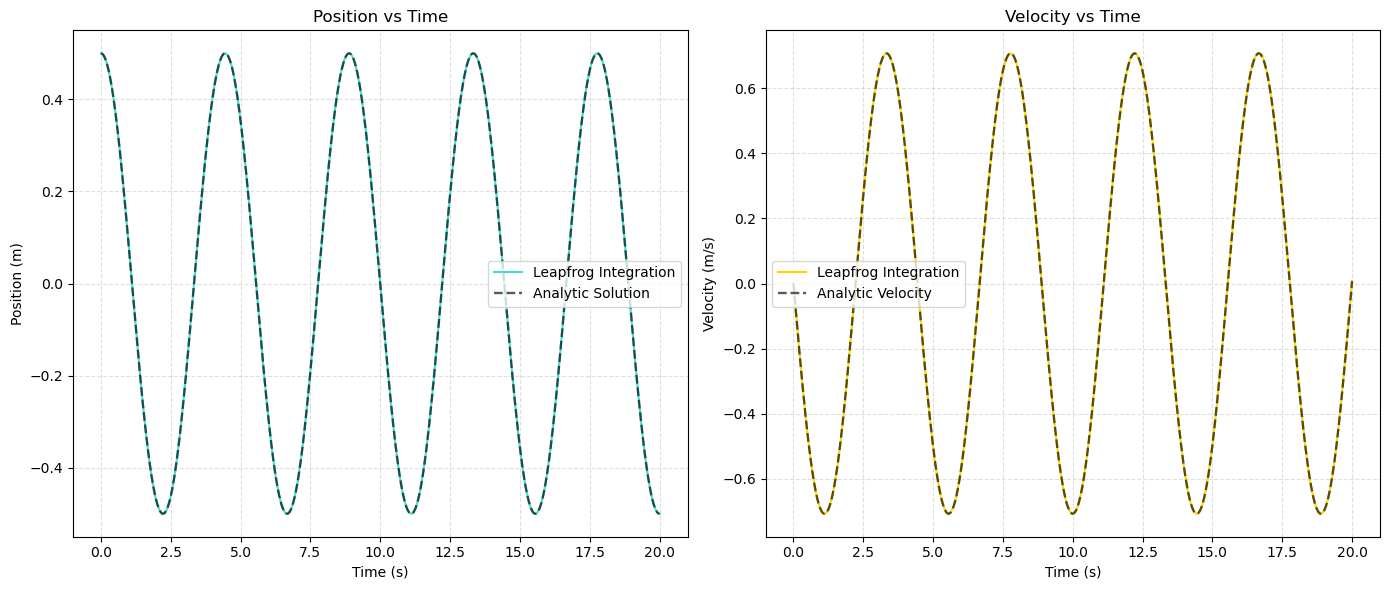

In [8]:
m = 5.0           # kg
k = 10.0          # N/m
x0 = 0.5          # initial position in meters
v0 = 0.0          # initial velocity in m/s
t_start = 0       # start time in seconds
t_end = 20        # end time in seconds
n_points = 10000

t_eval = np.linspace(t_start, t_end, n_points)
dt = t_eval[1] - t_eval[0]  # Time step
n_steps = len(t_eval) - 1

#analytical solution
omega = np.sqrt(k / m)
x_analytic = x0 * np.cos(omega * t_eval) + (v0 / omega) * np.sin(omega * t_eval)

def acceleration(x, k=10.0, m=5.0):
    return - (k / m) * x

def leapfrog_integration(x0, v0, a_func, dt, n_steps):
    """
    Leapfrog integration for a second-order ODE
    Parameters:
    - x0 - Initial position
    - v0 - Initial velocity
    - a_func -  acceleration function
    - dt - Time step.
    - n_steps - nr. steps to take
    Returns:
    - positions (list): Positions at each time step
    - velocities (list): Velocities at each time step
    """
    positions = [x0]
    velocities = [v0]
    
    # Initial half-step for velocity
    v_half = v0 + 0.5 * dt * a_func(x0)
    
    x = x0
    v = v_half
    
    for _ in range(n_steps):
        # Full step position update x
        x += dt * v
        positions.append(x)
        
        # Compute acceleration at new position
        a = a_func(x)
        
        # Full step velocity update
        v += dt * a 
        velocities.append(v - 0.5 * dt * a)  # aligns the velocity with the position's integer time step (integer time step)
        
    return positions, velocities


pos_leap, vel_leap = leapfrog_integration(x0, v0, acceleration, dt, n_steps)
pos_leap = np.array(pos_leap)
vel_leap = np.array(vel_leap)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(t_eval, pos_leap, label='Leapfrog Integration', color='turquoise')
plt.plot(t_eval, x_analytic, label='Analytic Solution', color='k', linestyle='--', alpha=0.65, linewidth=1.7)
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.grid(alpha=0.4, ls="--")

# velocity vs time
plt.subplot(1, 2, 2)
plt.plot(t_eval, vel_leap, label='Leapfrog Integration', color='gold')
plt.plot(t_eval, -x0 * omega * np.sin(omega * t_eval), label='Analytic Velocity', color='k', linestyle='--', alpha=0.65, linewidth=1.7)
plt.title('Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.grid(alpha=0.4, ls="--")

plt.tight_layout()
plt.show()

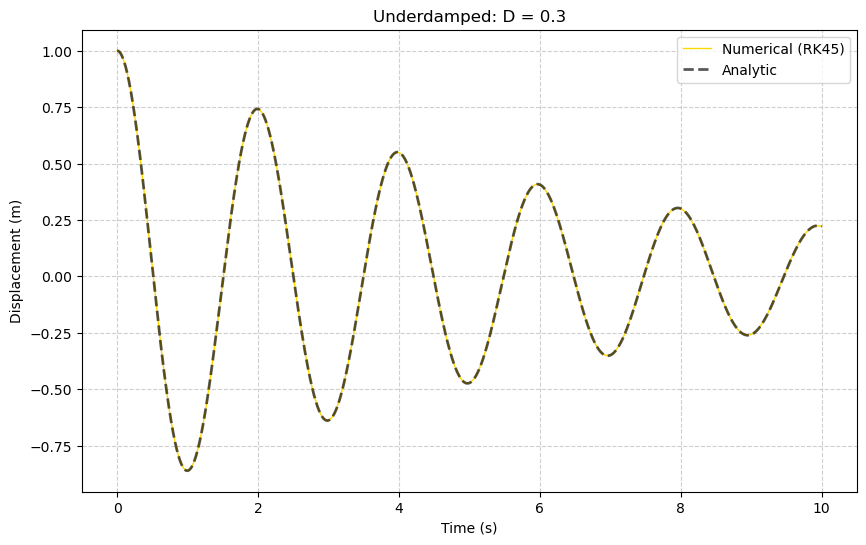

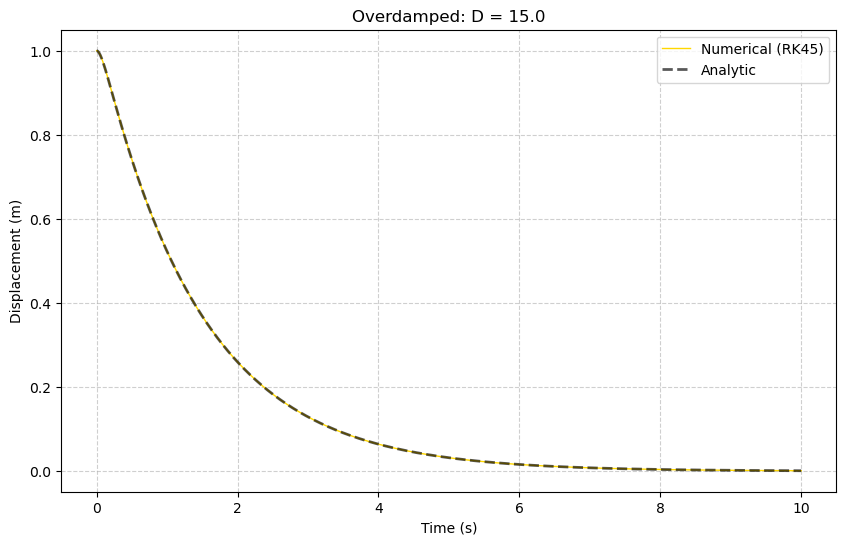

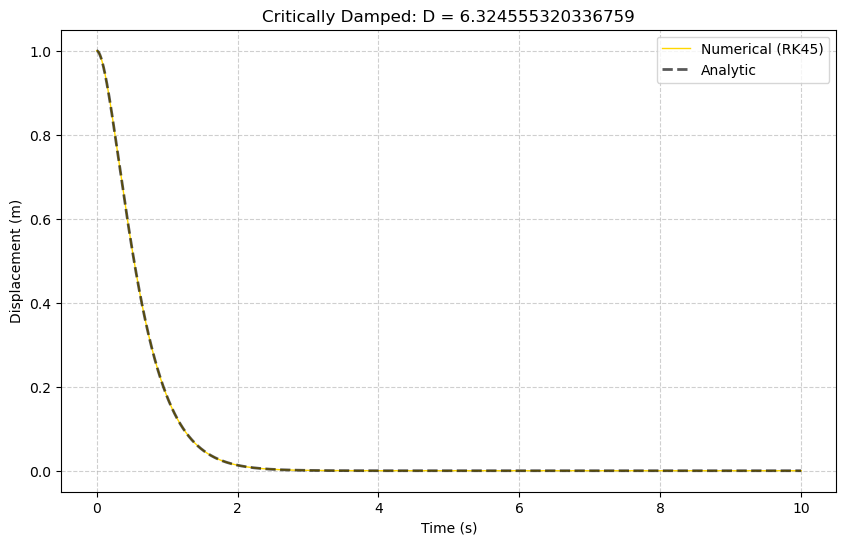

In [9]:
from scipy.integrate import solve_ivp

m = 1.0       # mass (kg)
k = 10.0      # spring constant (N/m)
x0 = 1.0      # initial displacement (m)
v0 = 0.0      # initial velocity (m/s)
t_start = 0.0
t_end = 10.0
num_points = 5000
t_eval = np.linspace(t_start, t_end, num_points)

# damping coeffs
D_underdamped = 0.3          # D < sqrt(4mk)
D_overdamped = 15.0           # D > sqrt(4mk)
D_critical = 2 * np.sqrt(m * k)  # D = sqrt(4mk)

def damped_harmonic_oscillator(t, y, k, m, D):
    """
    Parameters:
    - t (float): Current time
    - y (list or np.array): Current state [x, v]
    - k (float): Spring constant
    - m (float): Mass
    - D (float): Damping coefficient

    Returns:
    - dydt (list): Derivatives [dx/dt, dv/dt]
    """
    x, v = y
    dxdt = v
    dvdt = - (k/m) * x - (D/m) * v
    return [dxdt, dvdt]

def analytic_solution_underdamped(t, x0, v0, k, m, D):
    omega_0 = np.sqrt(k/m)
    gamma = D/(2*m)
    omega_d = np.sqrt(omega_0**2 - gamma**2)
    return np.exp(-gamma * t) * (x0 * np.cos(omega_d * t) + (v0 + gamma * x0)/omega_d * np.sin(omega_d * t))

def analytic_solution_overdamped(t, x0, v0, k, m, D):
    discriminant = D**2 - 4*m*k
    lambda1 = (-D + np.sqrt(discriminant)) / (2*m)
    lambda2 = (-D - np.sqrt(discriminant)) / (2*m)
    C1 = (v0 - lambda2 * x0) / (lambda1 - lambda2)
    C2 = (lambda1 * x0 - v0) / (lambda1 - lambda2)
    return C1 * np.exp(lambda1 * t) + C2 * np.exp(lambda2 * t)

def analytic_solution_critical(t, x0, v0, k, m, D):
    gamma = D/(2*m)
    return (x0 + (v0 + gamma * x0) * t) * np.exp(-gamma * t)

def solve_numerically(D):
    sol = solve_ivp(
        damped_harmonic_oscillator,
        [t_start, t_end],
        [x0, v0],
        args=(k, m, D),
        t_eval=t_eval,
        method='RK45'
    )
    return sol.t, sol.y[0]

def compute_analytic(D):
    if D**2 < 4*m*k:
        # Underdamped
        return analytic_solution_underdamped(t_eval, x0, v0, k, m, D)
    elif D**2 > 4*m*k:
        # Overdamped
        return analytic_solution_overdamped(t_eval, x0, v0, k, m, D)
    else:
        # Critically damped
        return analytic_solution_critical(t_eval, x0, v0, k, m, D)

def plot_results(D, label):
    t_num, x_num = solve_numerically(D)
    x_analytic = compute_analytic(D)
    
    
    plt.figure(figsize=(10, 6))
    plt.plot(t_num, x_num, label='Numerical (RK45)', color='gold', linewidth=1)
    plt.plot(t_num, x_analytic, label='Analytic', color='k', linestyle='--', alpha=0.65, linewidth=2)
    plt.title(f'{label}: D = {D}')
    plt.xlabel('Time (s)')
    plt.ylabel('Displacement (m)')
    plt.legend()
    plt.grid(alpha=0.6, ls="--")
    plt.show()

plot_results(D_underdamped, 'Underdamped')
plot_results(D_overdamped, 'Overdamped')
plot_results(D_critical, 'Critically Damped')


##### (C)
- Energy Conservation - Leapfrog's inherent symplectic (energy-conserving) nature conflicts with damping, which requires energy dissipation
- Could be possibly solved by incorporating damping factors directly into the velocity updates to account of energy loss